# Assignment 7 - How do we locate disease causing mutations?
## Combinatorial Pattern Matching

In [20]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

    
import pandas as pd
import numpy as np

import Assignment7_helper 

from pathlib import Path
home = str(Path.home()) # all other paths are relative to this path. 
# This is not relevant to most people because I recommended you use my server, but
# change home to where you are storing everything. Again. Not recommended.

[autoreload of pandas._testing failed: Traceback (most recent call last):
  File "/Users/sujanyasrinath/Library/Python/3.11/lib/python/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/sujanyasrinath/Library/Python/3.11/lib/python/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/opt/homebrew/Cellar/python@3.11/3.11.5/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/opt/homebrew/lib/python3.11/site-packages/pandas/_testing/__init__.py", line 935, in <module>
    cython_table = pd.core.common._cython_table.items()
      

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Exercise 1**: Trie construction problem - Construct a trie from a collection of patterns

Input: A collection of strings (``patterns``)

Output: ``trie(patterns)`` in the form a networkx direct graph.

In [21]:
Assignment7_helper.patterns1

['ATAGA', 'ATC', 'GAT']

In [22]:
Assignment7_helper.patterns2

['ananas', 'and', 'antenna', 'banana', 'bandana', 'nab', 'nana', 'pan']

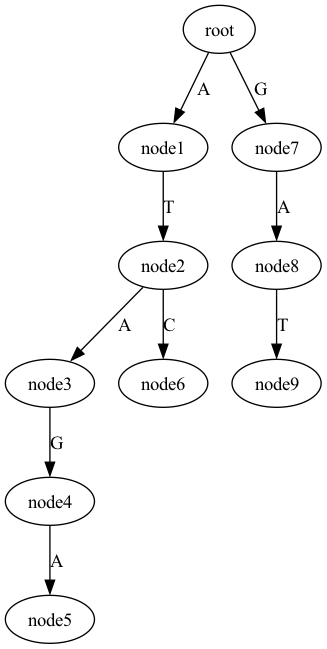

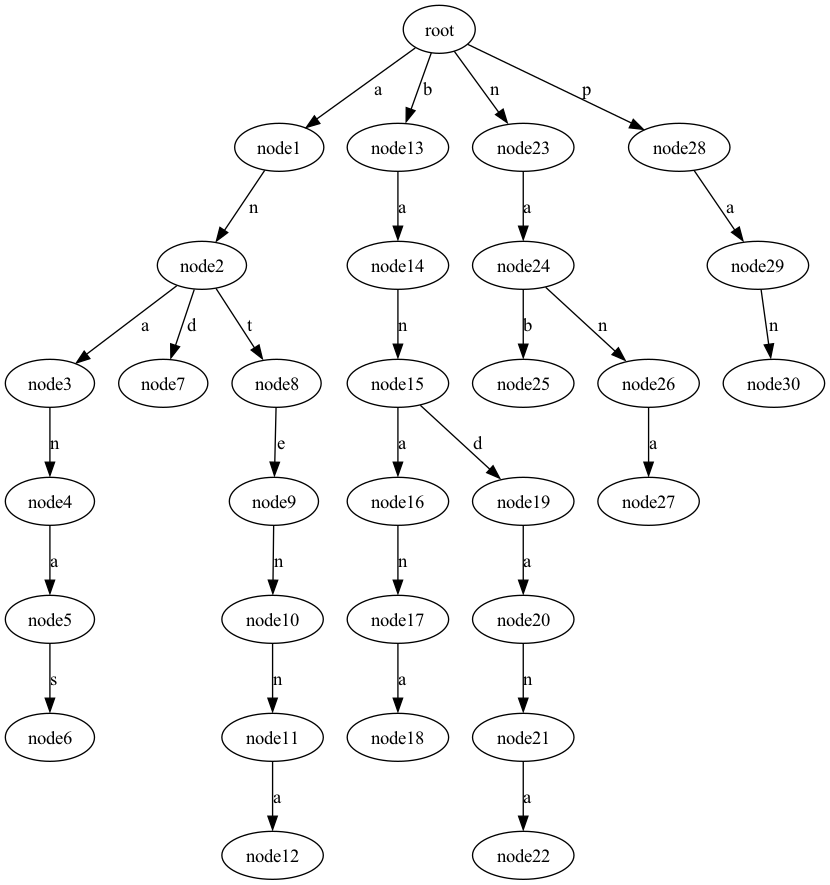

In [23]:
trie1 = Assignment7_helper.trie_construction(Assignment7_helper.patterns1)
Assignment7_helper.show(trie1)

trie2 = Assignment7_helper.trie_construction(Assignment7_helper.patterns2)
Assignment7_helper.show(trie2)

*Applying the trie to multiple pattern matching*

Given a string ``text`` and ``trie(patterns)``, it is easy to see if a prefix of ``text`` matches any of our patterns. 

We just need to simply work through the graph. If we get to a leaf node, then we can output the path from the root to the leaf node.

In [24]:
print(Assignment7_helper.prefix_trie_matching("bana",trie2))
print(Assignment7_helper.prefix_trie_matching("bananaabacadaba1",trie2))

None
banana


## Can you write a function that finds whether any strings in patterns match a substring of text?

*Exercise 2:* Find whether any strings in ``patterns`` match a substring of ``text`` starting at position $i$. 

Input: ``text`` and ``trie(patterns)``

Output: all of the starting locations $i$ where a string in ``patterns`` matches a substring of ``text``.

In [25]:
positions = Assignment7_helper.trie_matching("bananablahblahantennanabnablkjdf",trie2)
positions

[0, 2, 4, 14, 19, 21, 24]

*Exercise 3:* Construct a suffix trie

Input: ``text``

Output: a suffix trie as a networkx object.

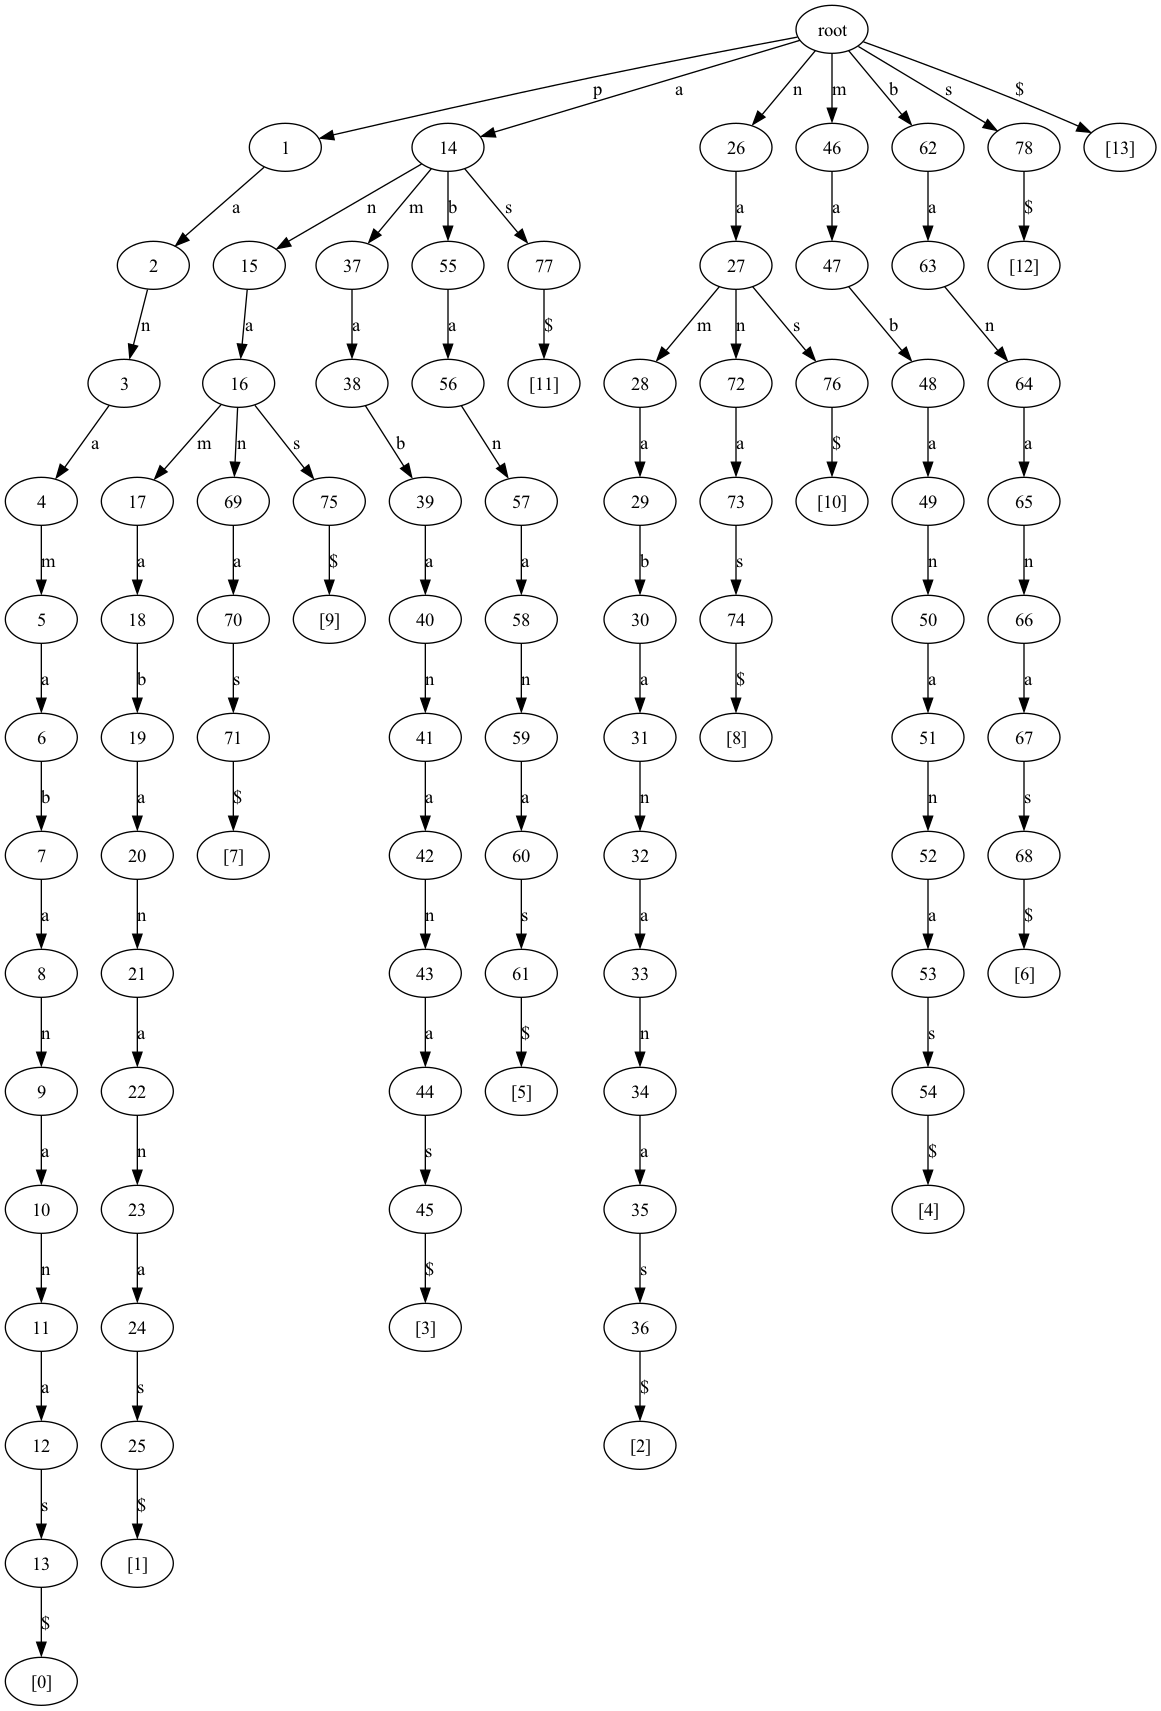

In [26]:
trie3 = Assignment7_helper.suffix_trie("panamabananas$")
Assignment7_helper.show(trie3)

**Exercise 4:** Modified suffix trie construction (not collapsed yet)

Input: A string ``text``

Output: Return a modified suffix trie as a networkx object using the method describe above

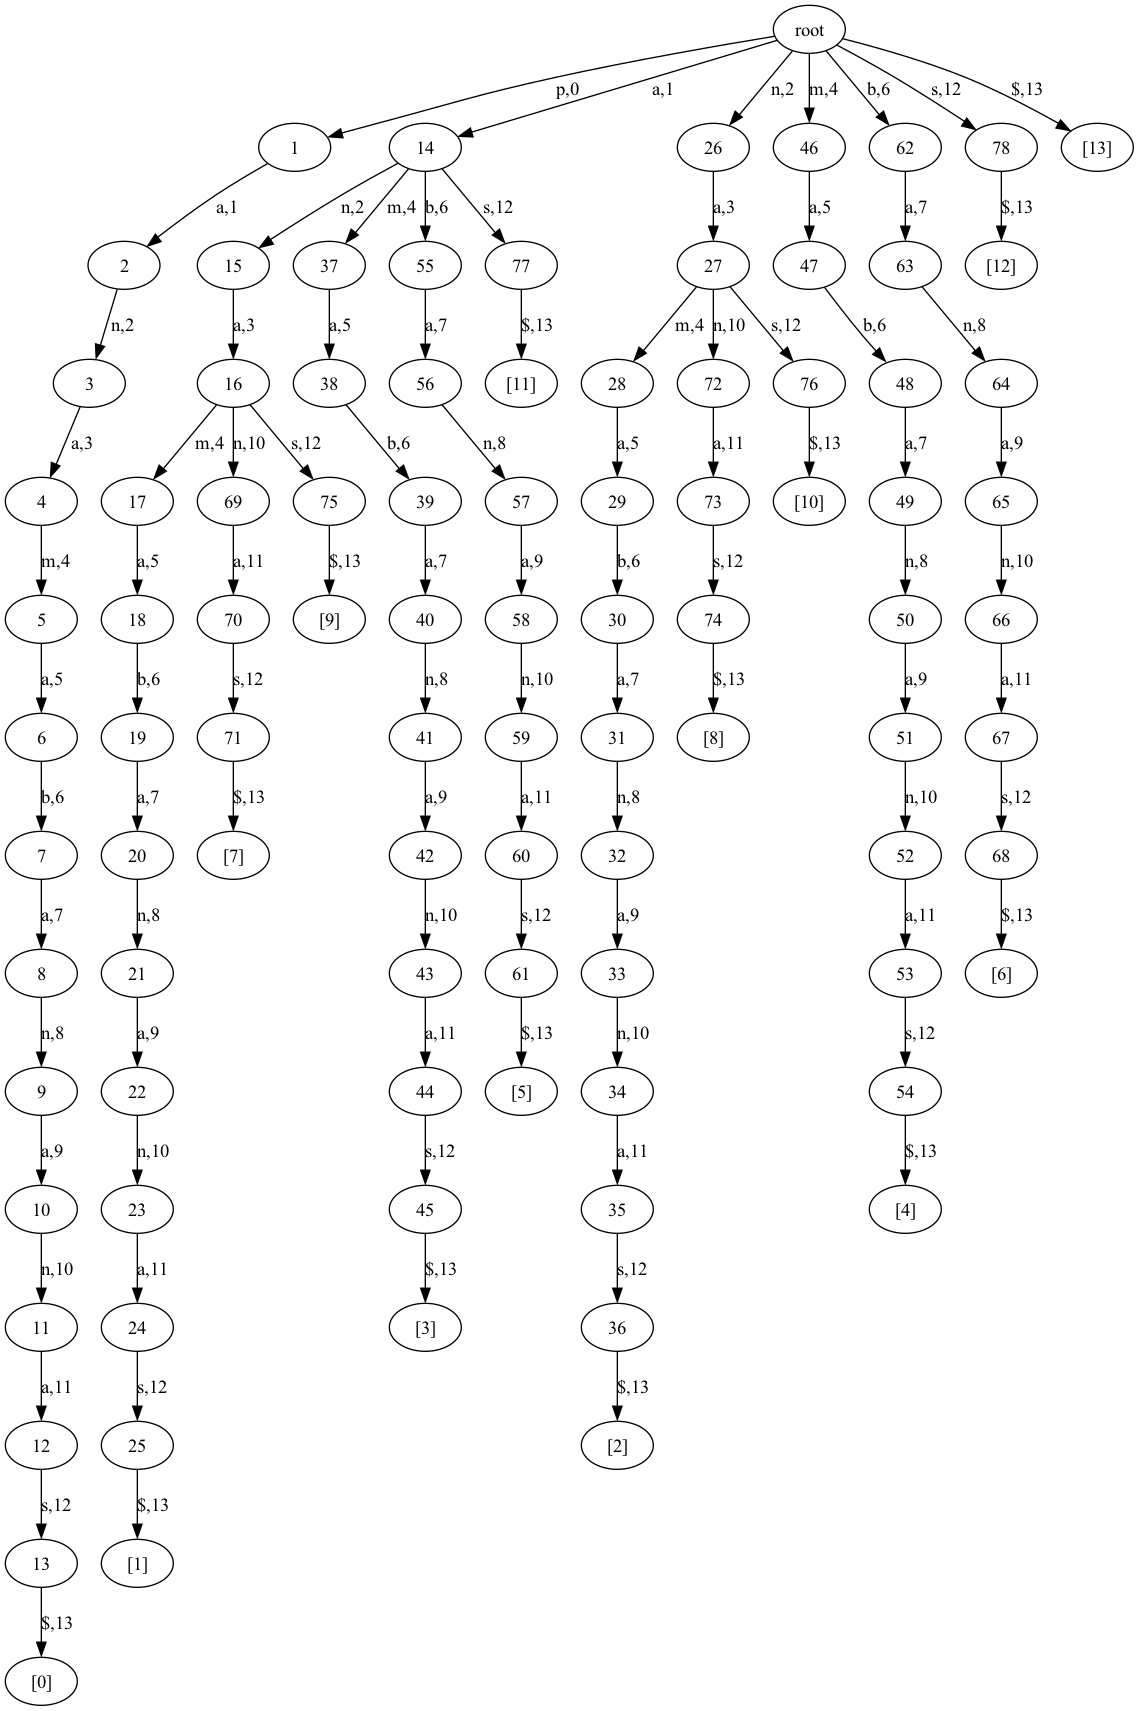

In [32]:
trie4,leaf_nodes = Assignment7_helper.modified_suffix_trie("panamabananas$")
Assignment7_helper.show(trie4)

## Putting it together
We are ready to put it together and collapse the edges. It is easy to see what we can collapse when there is a single path that is sequential. We also now have the numbers needed to collapse. We would use pointers (integers) instead of the string itself, but for display purposes we stick to the string.

**Exercise 5:** Modified suffix trie construction

Input: A string ``text``

Output: Return a suffix tree that is now collapsed with the edges containing the substring. 

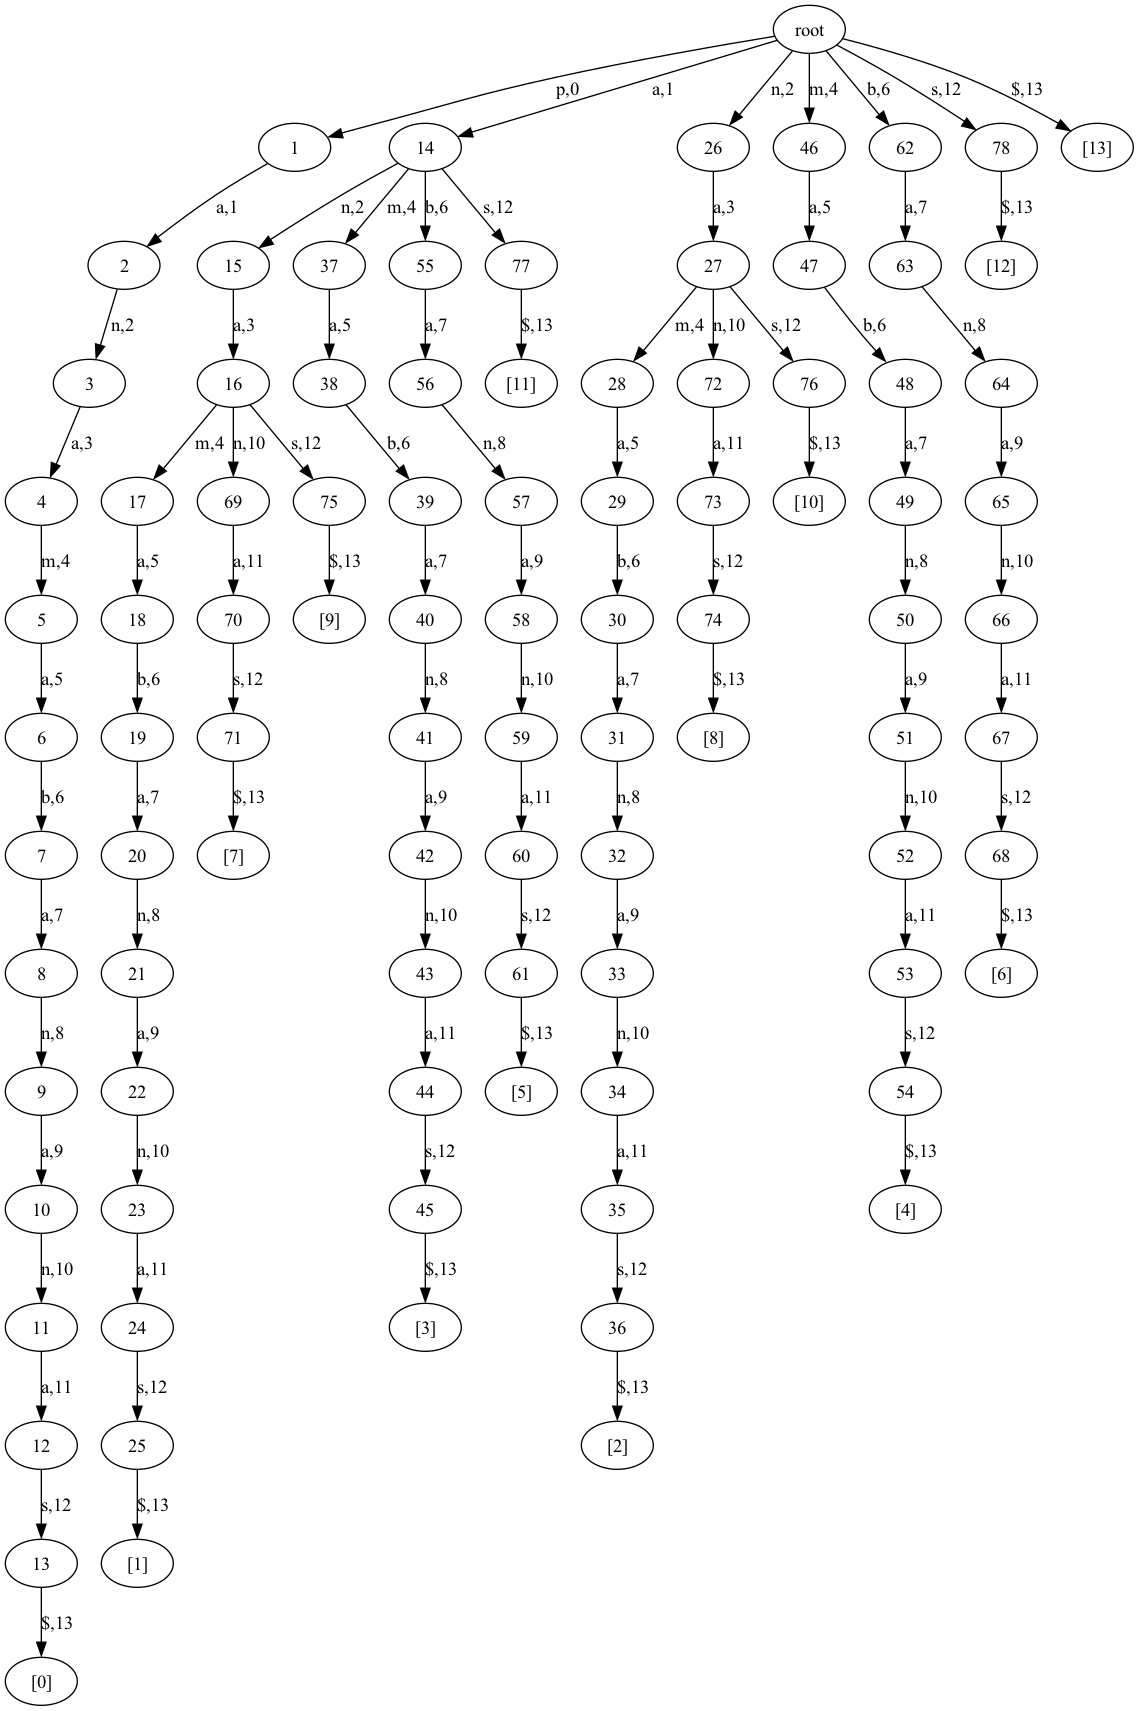

In [31]:
tree = Assignment7_helper.suffix_tree_construction("panamabananas$")
Assignment7_helper.show(tree)

In [30]:
Assignment7_helper.to_adj(tree).index

/Users/sujanyasrinath/Documents/Class_Archives/CSC448/Assignment7_helper.py:271: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  return df
/Users/sujanyasrinath/Documents/Class_Archives/CSC448/Assignment7_helper.py:269: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'p,0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  else:
/Users/sujanyasrinath/Documents/Class_Archives/CSC448/Assignment7_helper.py:269: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'a,1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  else:
/Users/sujanyasrinath/Documents/Class_Archives/CSC448/Assignment7_helper.py:269: FutureWarning: Settin

Index(['root',      1,      2,      3,      4,      5,      6,      7,      8,
            9,     10,     11,     12,     13,  '[0]',     14,     15,     16,
           17,     18,     19,     20,     21,     22,     23,     24,     25,
        '[1]',     26,     27,     28,     29,     30,     31,     32,     33,
           34,     35,     36,  '[2]',     37,     38,     39,     40,     41,
           42,     43,     44,     45,  '[3]',     46,     47,     48,     49,
           50,     51,     52,     53,     54,  '[4]',     55,     56,     57,
           58,     59,     60,     61,  '[5]',     62,     63,     64,     65,
           66,     67,     68,  '[6]',     69,     70,     71,  '[7]',     72,
           73,     74,  '[8]',     75,  '[9]',     76, '[10]',     77, '[11]',
           78, '[12]', '[13]'],
      dtype='object')

In [20]:
# Don't forget to push!